This project is based on Lesson 2 of the [fast.ai course](https://course.fast.ai/)

In [1]:
from fastai.vision import *

In [5]:
path = Path('data/brass')
pairs = [
    ('trumpet', 'urls_trumpet.csv'),
    ('trombone', 'urls_trombone.csv'),
    ('tuba', 'urls_tuba.csv')
]
for folder, file in pairs:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=100)

In [6]:
np.random.seed(1)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['trombone', 'trumpet', 'tuba']

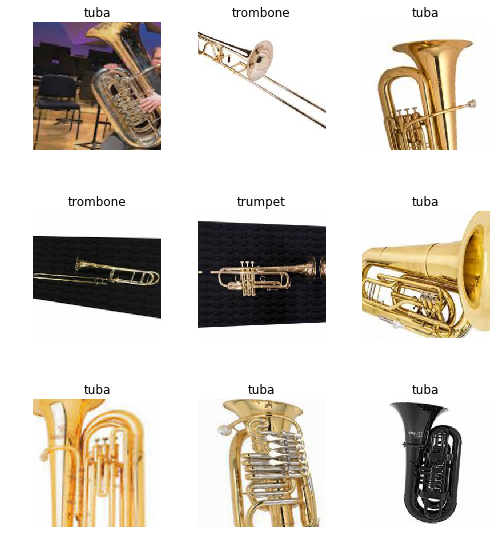

In [13]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['trombone', 'trumpet', 'tuba'], 3, 192, 48)

# Train

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.114101,0.258574,0.104167,00:02
1,0.112726,0.214937,0.083333,00:02
2,0.086650,0.209560,0.104167,00:02
3,0.072294,0.206944,0.104167,00:02


In [24]:
learn.save('stage-1')

In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


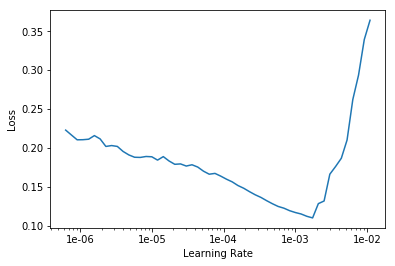

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.160406,0.192142,0.083333,00:03
1,0.163458,0.220065,0.125000,00:03
